# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "../copy_all_files_here/city_data.csv"
ride_data_to_load = "../copy_all_files_here/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [5]:
#  1. Get the total rides for each city type
tot_ride_bytype = pyber_data_df.groupby(['type']).count()['ride_id']
tot_ride_bytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
tot_driv_bytype = city_data_df.groupby(['type']).sum()['driver_count']
tot_driv_bytype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
tot_fare_bytype = pyber_data_df.groupby(['type']).sum()['fare']
tot_fare_bytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avefare_perride_bytype = tot_fare_bytype/tot_ride_bytype
avefare_perride_bytype

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
avefare_perdriver_bytype = tot_fare_bytype/tot_driv_bytype
avefare_perdriver_bytype

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
#create DF of these three columns
bytypedf = pd.DataFrame({
    'Total Rides': tot_ride_bytype,
    'Drivers': tot_driv_bytype,
    'Total Fares': tot_fare_bytype,
    'Ave. Fare per Ride': avefare_perride_bytype,
    'Ave. Fare per Driver':avefare_perdriver_bytype
})
bytypedf

,Total Rides,Drivers,Total Fares,Ave. Fare per Ride,Ave. Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
bytypedf.index.name = None
bytypedf

,Total Rides,Drivers,Total Fares,Ave. Fare per Ride,Ave. Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
bytypedf.dtypes

Total Rides               int64
Drivers                   int64
Total Fares             float64
Ave. Fare per Ride      float64
Ave. Fare per Driver    float64
dtype: object

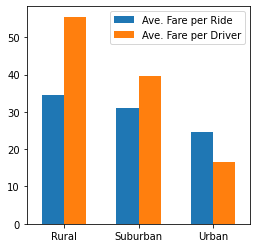

In [38]:
###Bar Charts for analysis
yax=np.arange(len(bytypedf.index))
plt.figure(figsize=(4,4))
plt.bar(yax,bytypedf['Ave. Fare per Ride'],align='edge',width=-0.3,label='Ave. Fare per Ride')
plt.bar(yax,bytypedf['Ave. Fare per Driver'],align='edge',width=0.3,label='Ave. Fare per Driver')
plt.xticks([0,1,2],bytypedf.index)
plt.xlim(-0.5,2.5)
plt.legend()
plt.savefig("Resources/Ave_Fares_Two_Ways_per_City_Type")

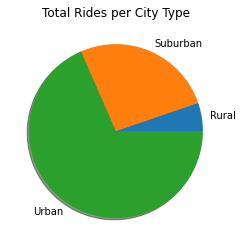

In [39]:
###Pie Charts for analysis
plt.pie(bytypedf['Total Rides'],labels=bytypedf.index,shadow=True)
plt.title("Total Rides per City Type")

plt.savefig("Resources/Total_Rides_per_City_Type")

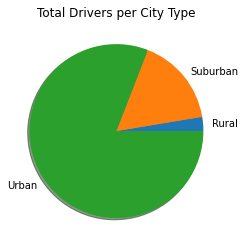

In [40]:
###Pie Charts for analysis
plt.pie(bytypedf['Drivers'],labels=bytypedf.index,shadow=True)
plt.title("Total Drivers per City Type")

plt.savefig("Resources/Total_Drivers_per_City_Type")

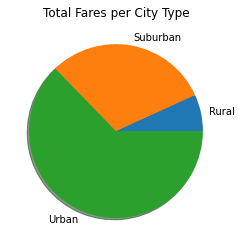

In [41]:
###Pie Charts for analysis
plt.pie(bytypedf['Total Fares'],labels=bytypedf.index,shadow=True)
plt.title("Total Fares per City Type")

plt.savefig("Resources/Total_Fares_per_City_Type")

In [42]:
#  8. Format the columns.
bytypedf['Total Fares'] = bytypedf['Total Fares'].apply('${0:,.2f}'.format)
bytypedf['Drivers'] = bytypedf['Drivers'].apply('{:,}'.format)
bytypedf['Ave. Fare per Ride'] = bytypedf['Ave. Fare per Ride'].apply('${:.2f}'.format)
bytypedf['Ave. Fare per Driver'] = bytypedf['Ave. Fare per Driver'].apply('${:.2f}'.format)

bytypedf

,Total Rides,Drivers,Total Fares,Ave. Fare per Ride,Ave. Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,"2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [43]:
# Print the merged DataFrame for reference.
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [44]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
typedate_df = pyber_data_df.groupby(['type','date']).sum()['fare']


typedate_df

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [45]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
typedate_df=typedate_df.reset_index()
typedate_df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [46]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

tdpivot_df = typedate_df.pivot(['date'],['type'],['fare'])
tdpivot_df


fare                
type           Rural Suburban  Urban
date                                
1/1/2019 0:08    NaN      NaN  37.91
1/1/2019 0:46    NaN    47.74    NaN
1/1/2019 12:32   NaN    25.56    NaN
1/1/2019 14:40   NaN      NaN   5.42
1/1/2019 14:42   NaN      NaN  12.31
...              ...      ...    ...
5/8/2019 1:54    NaN      NaN  32.69
5/8/2019 2:31    NaN      NaN  41.33
5/8/2019 4:20    NaN      NaN  21.99
5/8/2019 4:39    NaN      NaN  18.45
5/8/2019 7:29    NaN      NaN  18.55

[2361 rows x 3 columns]

In [47]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_tdp = tdpivot_df.loc['1/1/2019':'4/29/2019']

new_tdp


fare                
type           Rural Suburban  Urban
date                                
1/1/2019 0:08    NaN      NaN  37.91
1/1/2019 0:46    NaN    47.74    NaN
1/1/2019 12:32   NaN    25.56    NaN
1/1/2019 14:40   NaN      NaN   5.42
1/1/2019 14:42   NaN      NaN  12.31
...              ...      ...    ...
4/28/2019 4:34   NaN      NaN  40.46
4/28/2019 8:15   NaN      NaN  22.86
4/28/2019 9:03   NaN      NaN  15.00
4/28/2019 9:10   NaN      NaN   5.73
4/28/2019 9:25   NaN      NaN  37.35

[2057 rows x 3 columns]

In [48]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_tdp.index = pd.to_datetime(new_tdp.index)
new_tdp

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 12:32:00   NaN    25.56    NaN
2019-01-01 14:40:00   NaN      NaN   5.42
2019-01-01 14:42:00   NaN      NaN  12.31
...                   ...      ...    ...
2019-04-28 04:34:00   NaN      NaN  40.46
2019-04-28 08:15:00   NaN      NaN  22.86
2019-04-28 09:03:00   NaN      NaN  15.00
2019-04-28 09:10:00   NaN      NaN   5.73
2019-04-28 09:25:00   NaN      NaN  37.35

[2057 rows x 3 columns]

In [49]:
# 6. Check that the datatype for the index is datetime using df.info()
new_tdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     105 non-null    float64
 1   (fare, Suburban)  538 non-null    float64
 2   (fare, Urban)     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [50]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weeklydf = new_tdp.resample('w').sum()['fare']
weeklydf

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


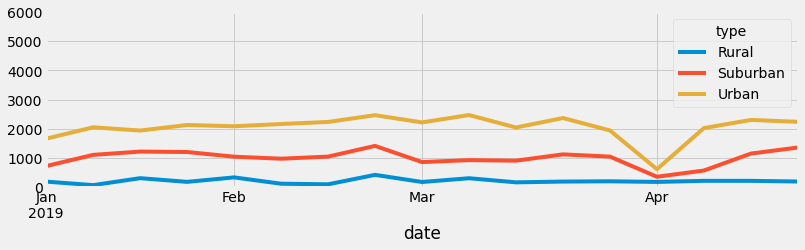

In [51]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weeklydf.plot(figsize=(12,3)).set_ylim(0, 6000)
plt.savefig("UrbanRuralSuburban_Weekly_Rides.png")